In [27]:
import pandas as pd
import exchange_calendars as ecals
import matplotlib.pyplot as plt
import datetime

In [5]:
data = pd.read_csv('../data/train.csv', encoding='euckr')
del data['id']

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4701217 entries, 0 to 4701216
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   base_date              int64  
 1   day_of_week            int64  
 2   base_hour              int64  
 3   lane_count             int64  
 4   road_rating            int64  
 5   road_name              object 
 6   multi_linked           int64  
 7   connect_code           int64  
 8   maximum_speed_limit    float64
 9   vehicle_restricted     float64
 10  weight_restricted      float64
 11  height_restricted      float64
 12  road_type              int64  
 13  start_node_name        object 
 14  start_latitude         float64
 15  start_longitude        float64
 16  start_turn_restricted  object 
 17  end_node_name          object 
 18  end_latitude           float64
 19  end_longitude          float64
 20  end_turn_restricted    object 
 21  target                 float64
 22  month             

## day_of_week number mapping

In [7]:
date = {'일' : 0, '월' : 1, '화' : 2, '수' : 3, '목' : 4, '금': 5, '토': 6}
data['day_of_week'] = data['day_of_week'].map(date)

In [8]:
data['day_of_week']

0          4
1          4
2          0
3          5
4          2
          ..
4701212    4
4701213    4
4701214    1
4701215    3
4701216    2
Name: day_of_week, Length: 4701217, dtype: int64

## sunday data dist

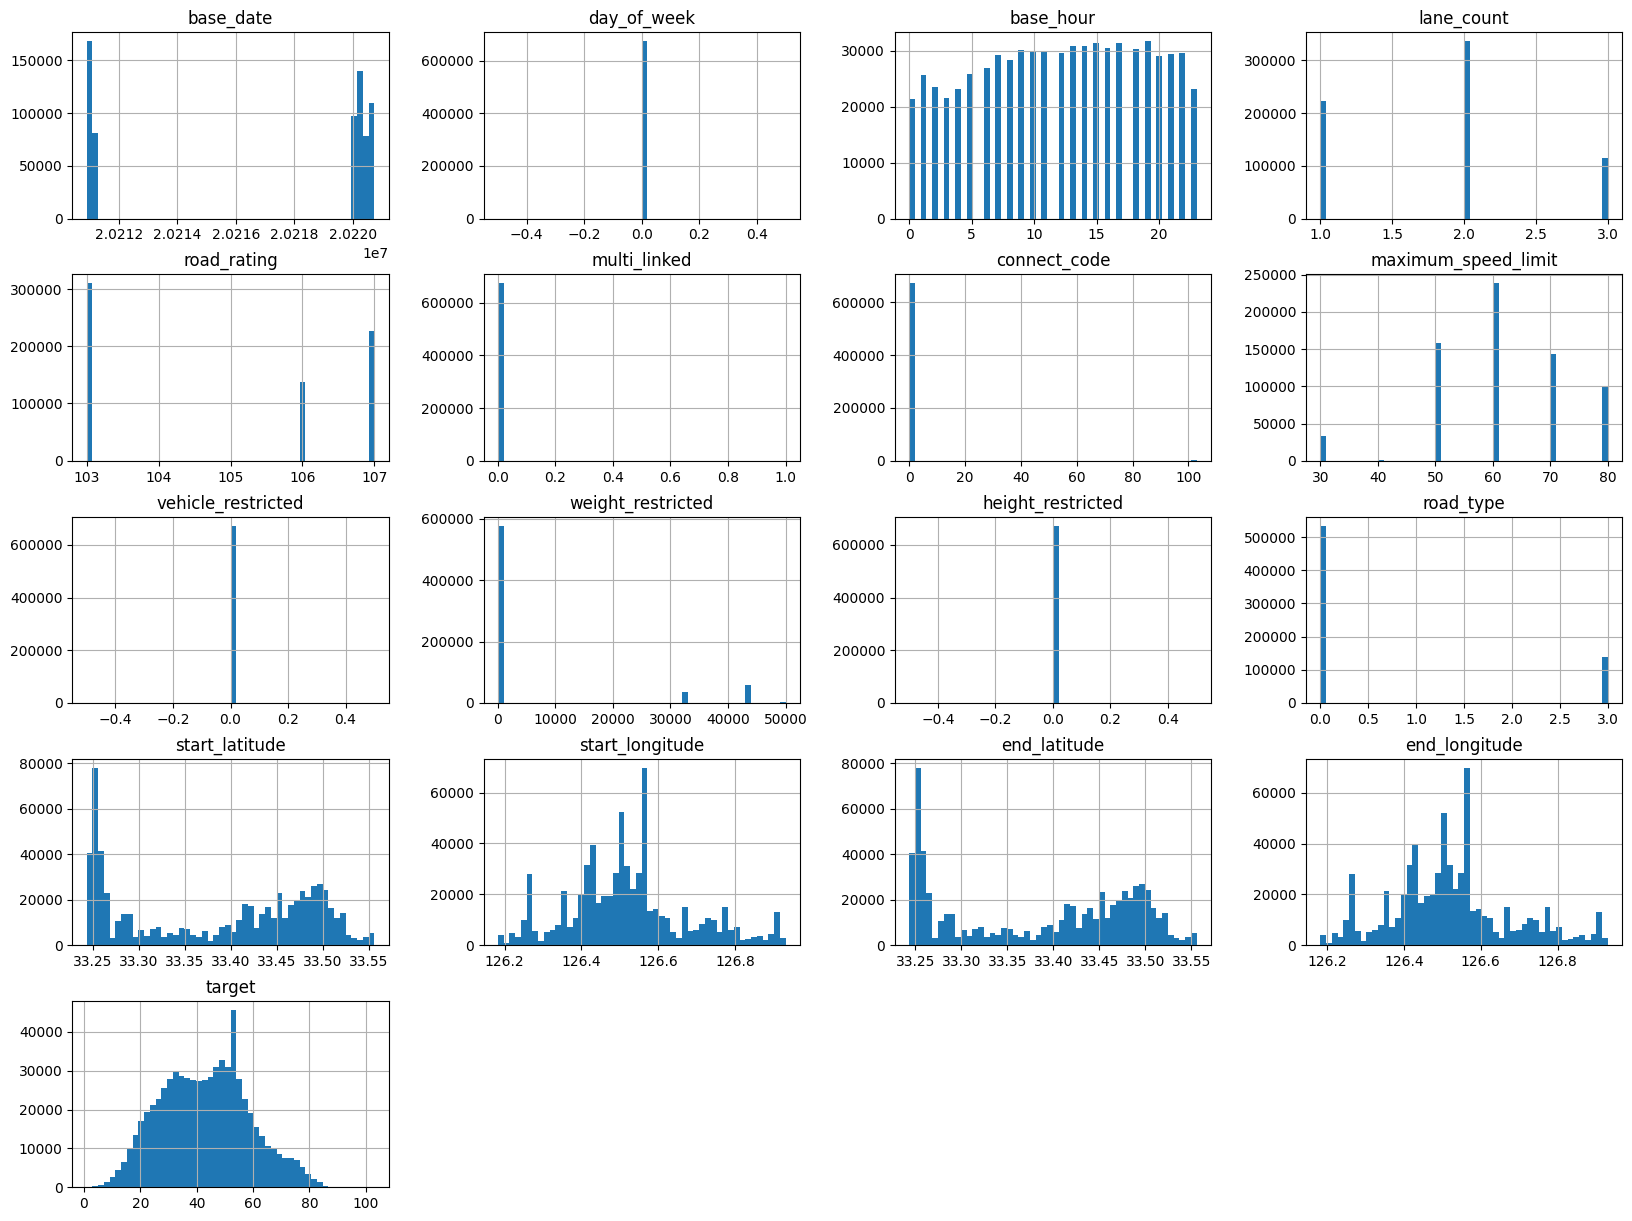

In [10]:
sun_data = data[data['day_of_week'] == 0]
sun_data.hist(bins=50, figsize=(20, 15))
plt.show()

## tuesday data dist

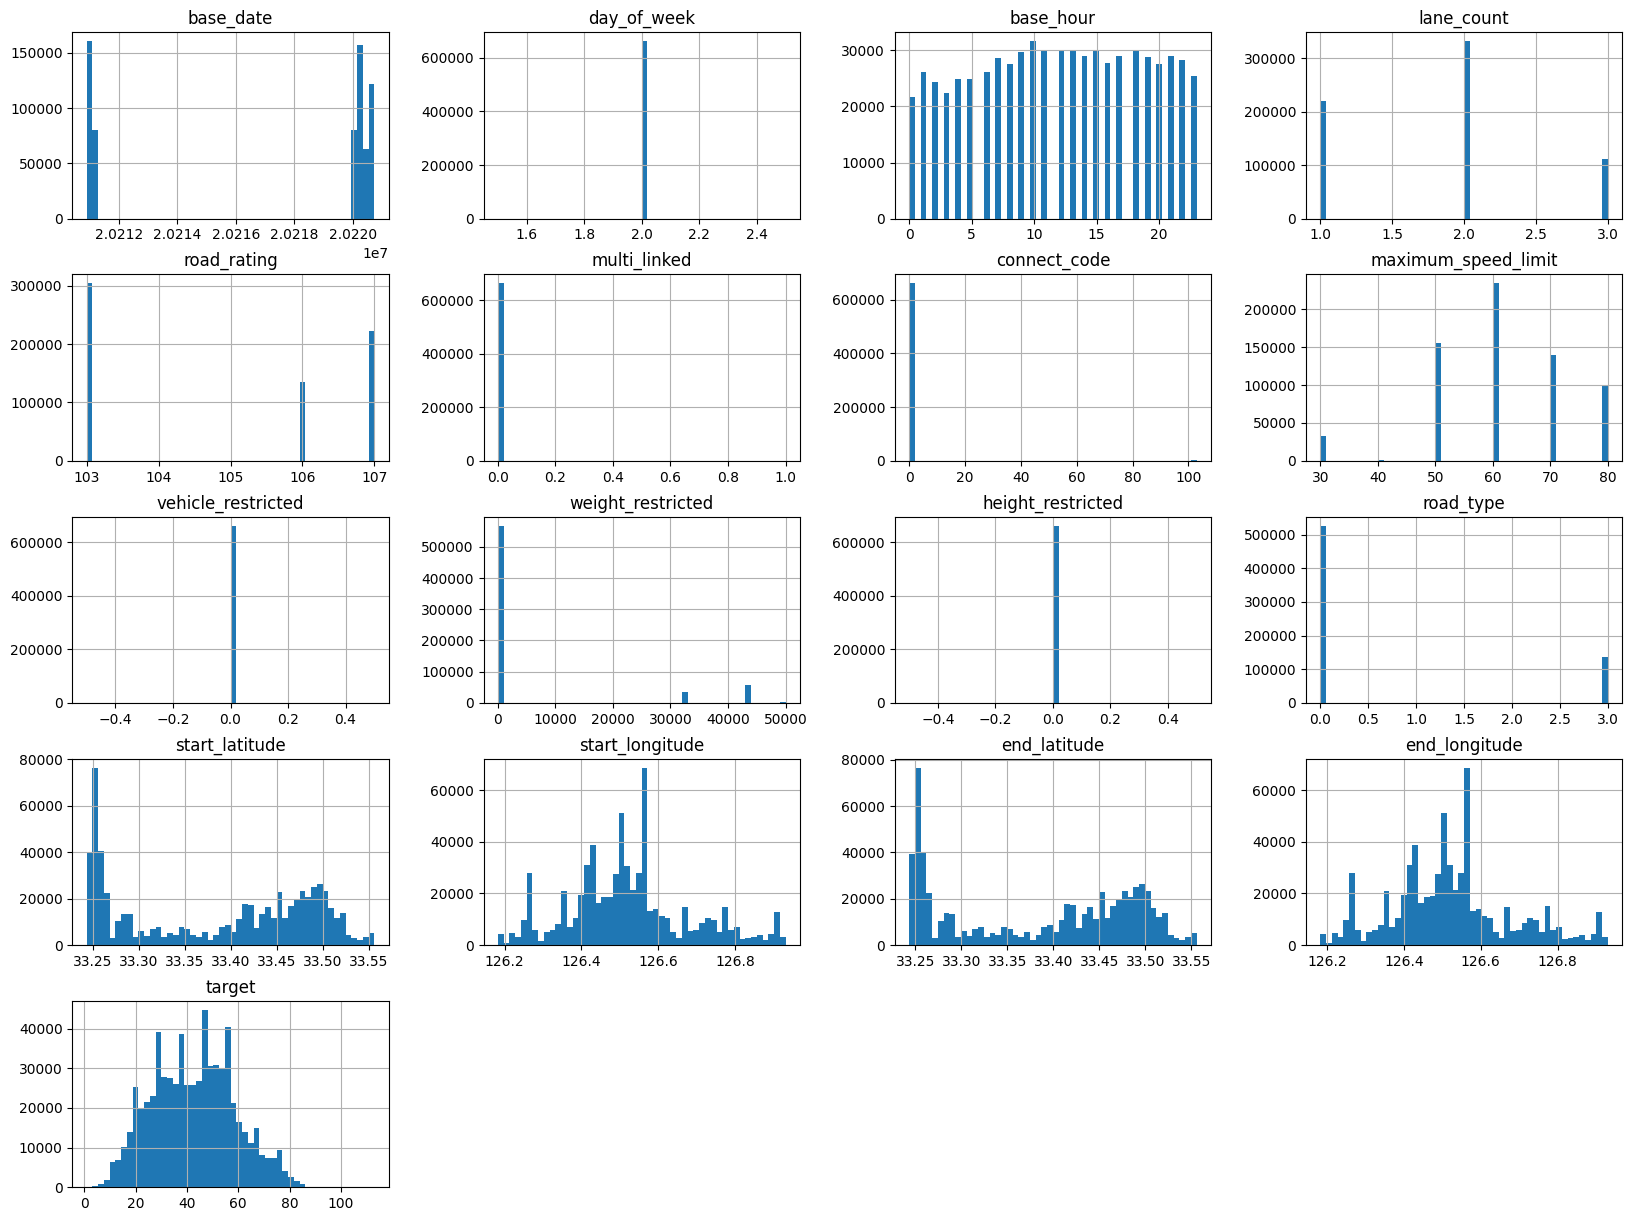

In [11]:
tue_data =  data[data['day_of_week'] == 2]
tue_data.hist(bins=50, figsize=(20, 15))
plt.show()

## zero hour dist

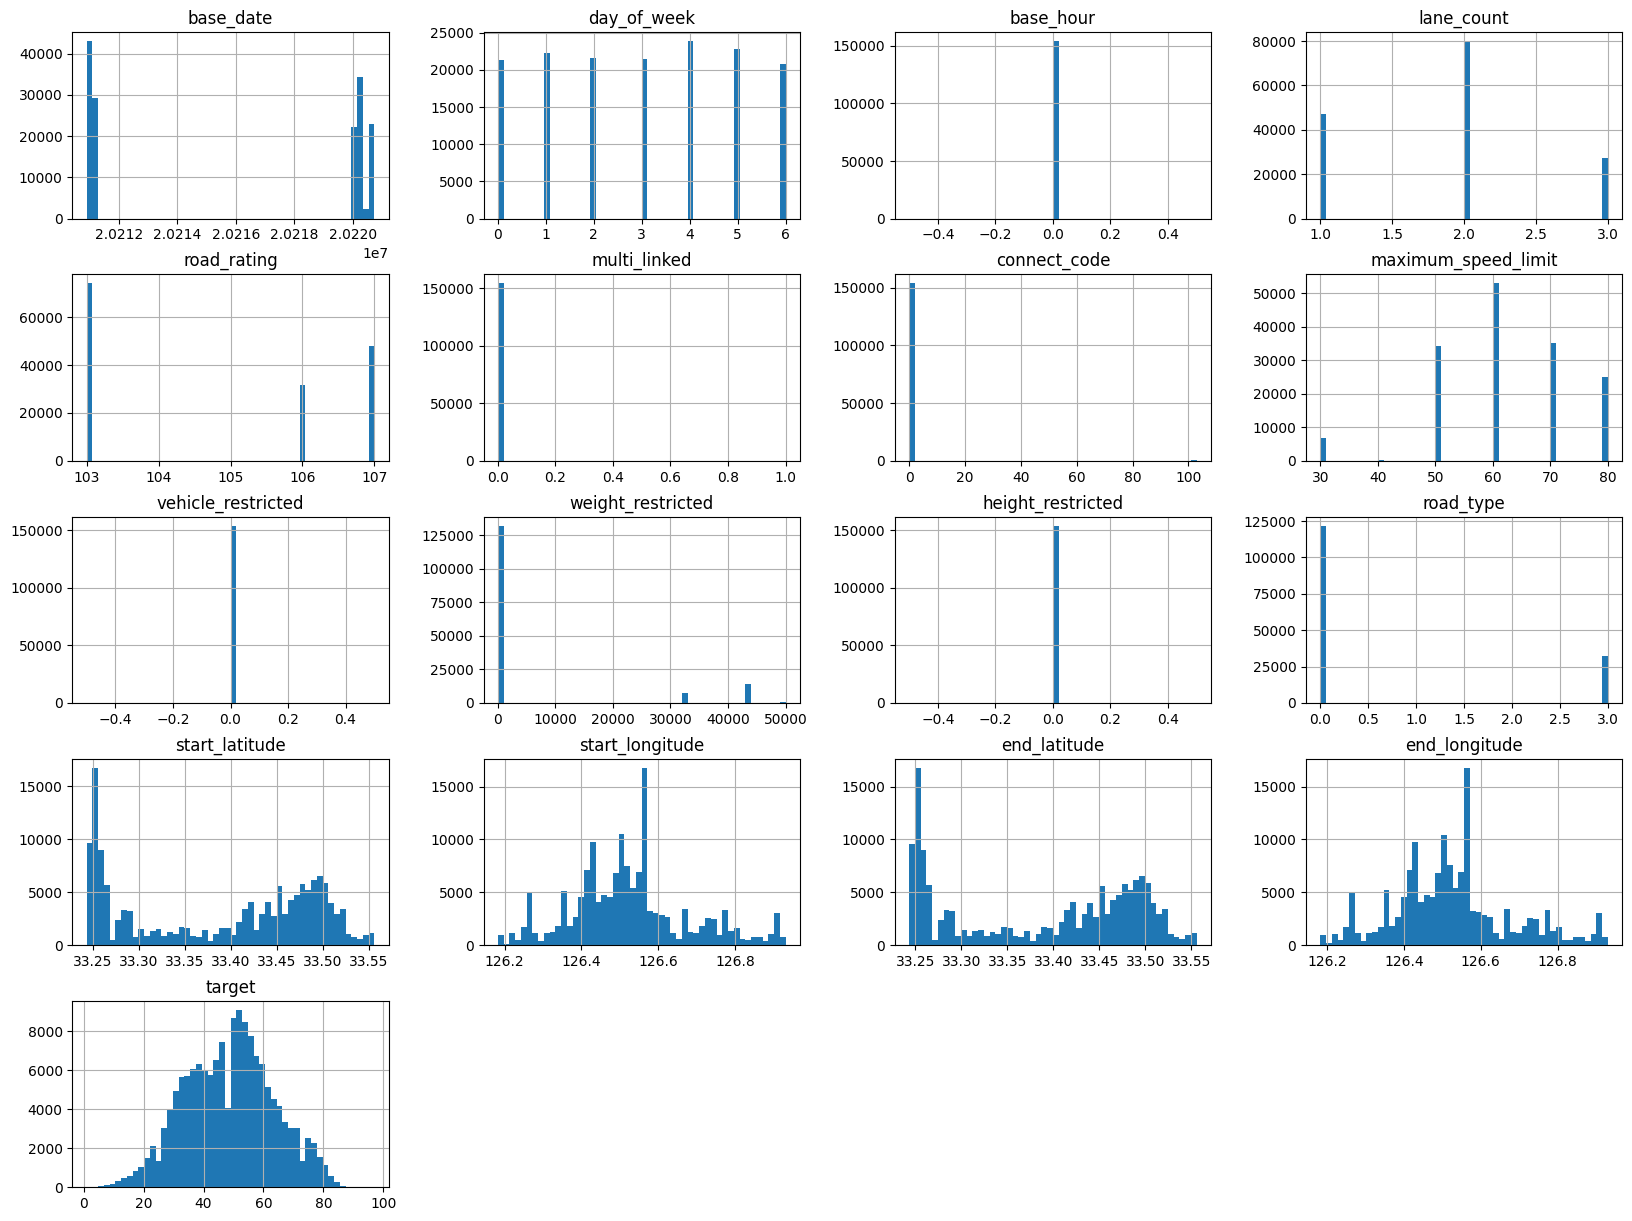

In [12]:
zero_hour_data = data[data['base_hour'] == 0]
zero_hour_data.hist(bins=50, figsize=(20, 15))
plt.show()

## one hour dist

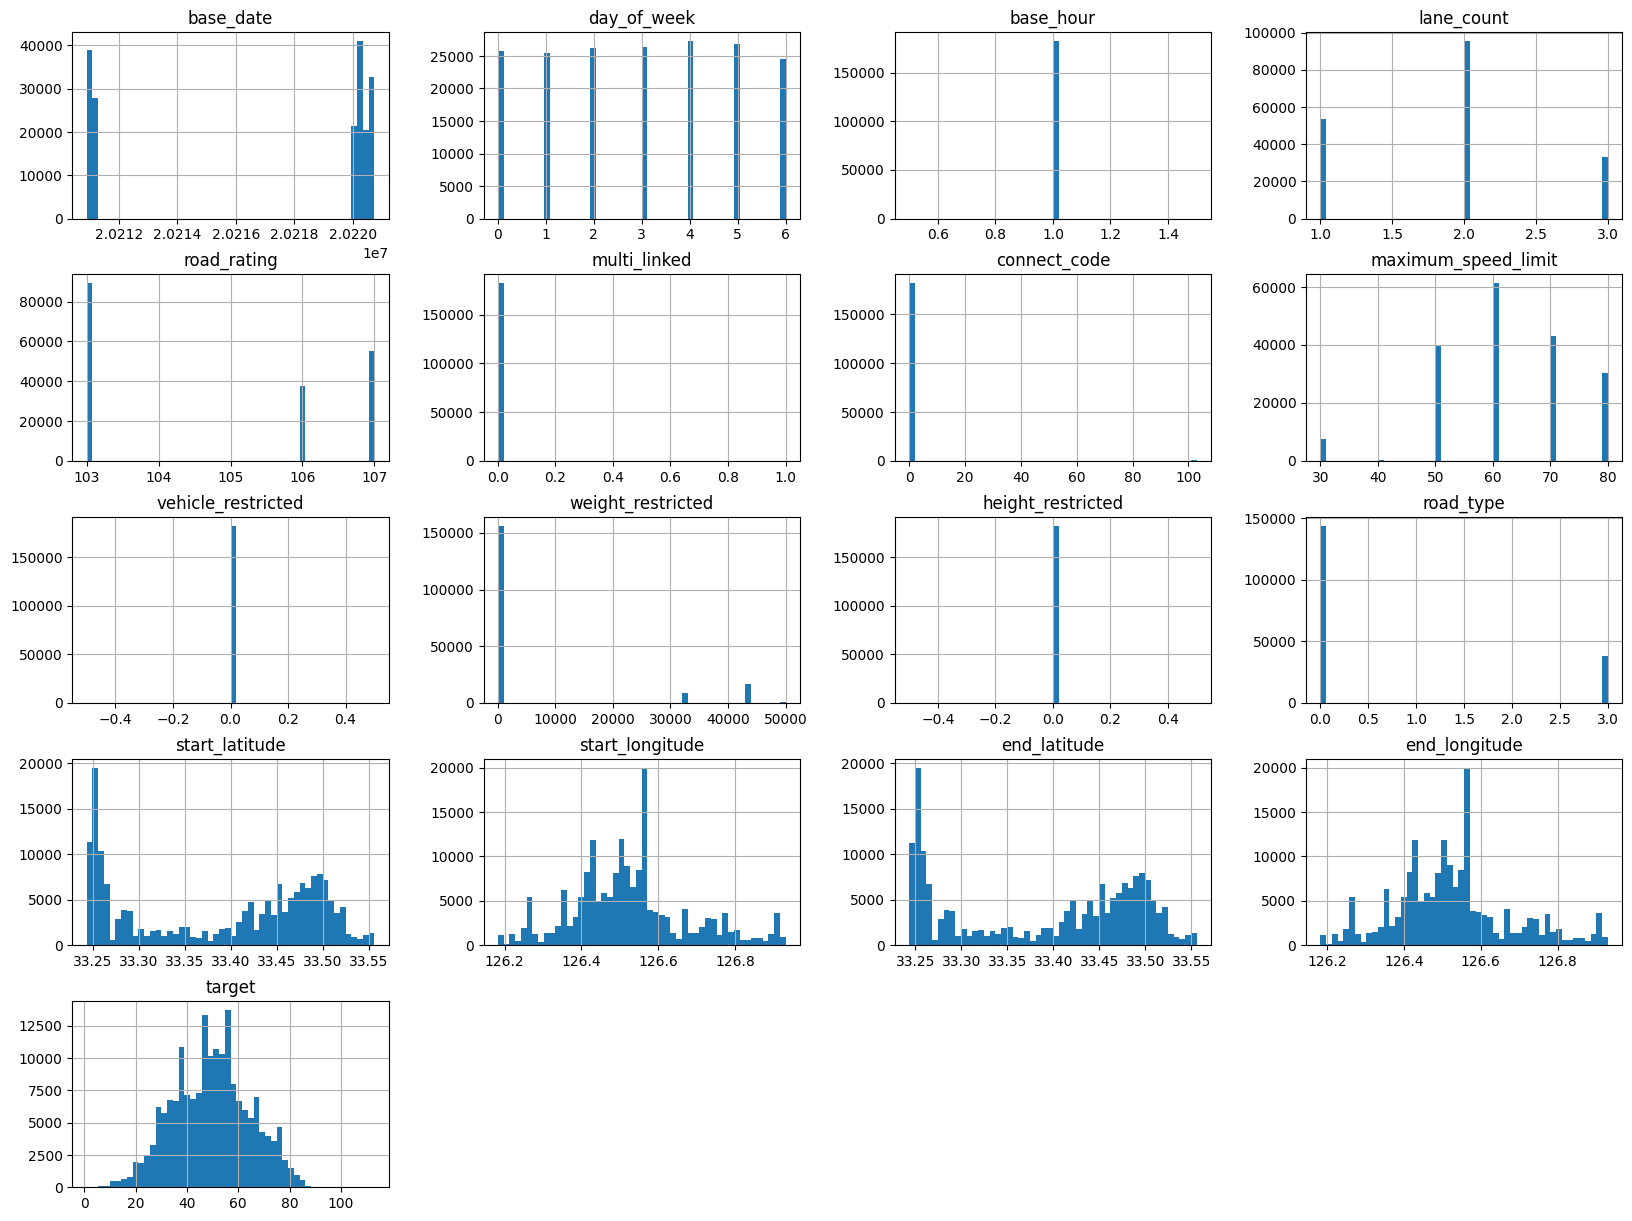

In [14]:
one_hour_data = data[data['base_hour'] == 1]
one_hour_data.hist(bins=50, figsize=(20, 15))
plt.show()

In [15]:
data['base_date']

0          20220623
1          20220728
2          20211010
3          20220311
4          20211005
             ...   
4701212    20211104
4701213    20220331
4701214    20220613
4701215    20211020
4701216    20211019
Name: base_date, Length: 4701217, dtype: int64

In [16]:
data['month'] = data['base_date'].apply(lambda e: str(e)[4:6])
data['month'] = data['month'].astype(int)
data.dtypes

base_date                  int64
day_of_week                int64
base_hour                  int64
lane_count                 int64
road_rating                int64
road_name                 object
multi_linked               int64
connect_code               int64
maximum_speed_limit      float64
vehicle_restricted       float64
weight_restricted        float64
height_restricted        float64
road_type                  int64
start_node_name           object
start_latitude           float64
start_longitude          float64
start_turn_restricted     object
end_node_name             object
end_latitude             float64
end_longitude            float64
end_turn_restricted       object
target                   float64
month                      int64
dtype: object

In [17]:
data['month']

0           6
1           7
2          10
3           3
4          10
           ..
4701212    11
4701213     3
4701214     6
4701215    10
4701216    10
Name: month, Length: 4701217, dtype: int64

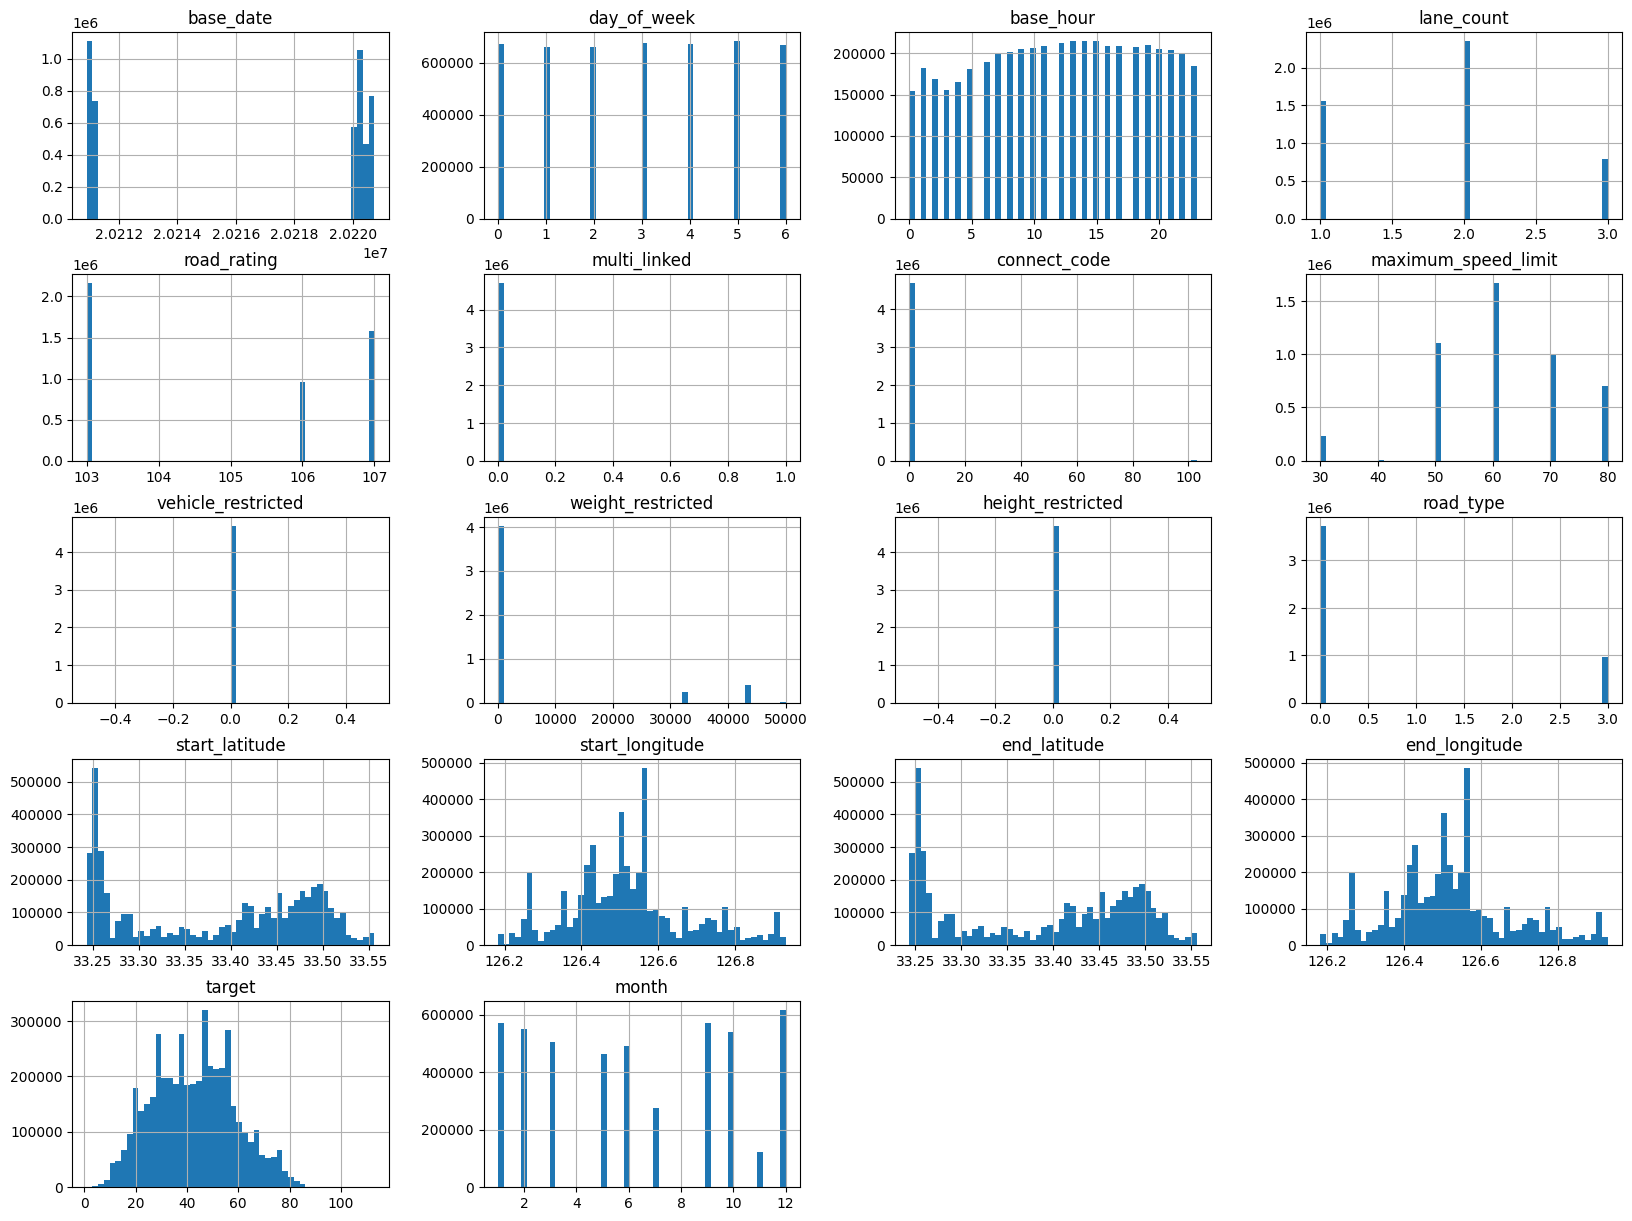

In [18]:
data.hist(bins=50, figsize=(20, 15))
plt.show()

## Feb dist

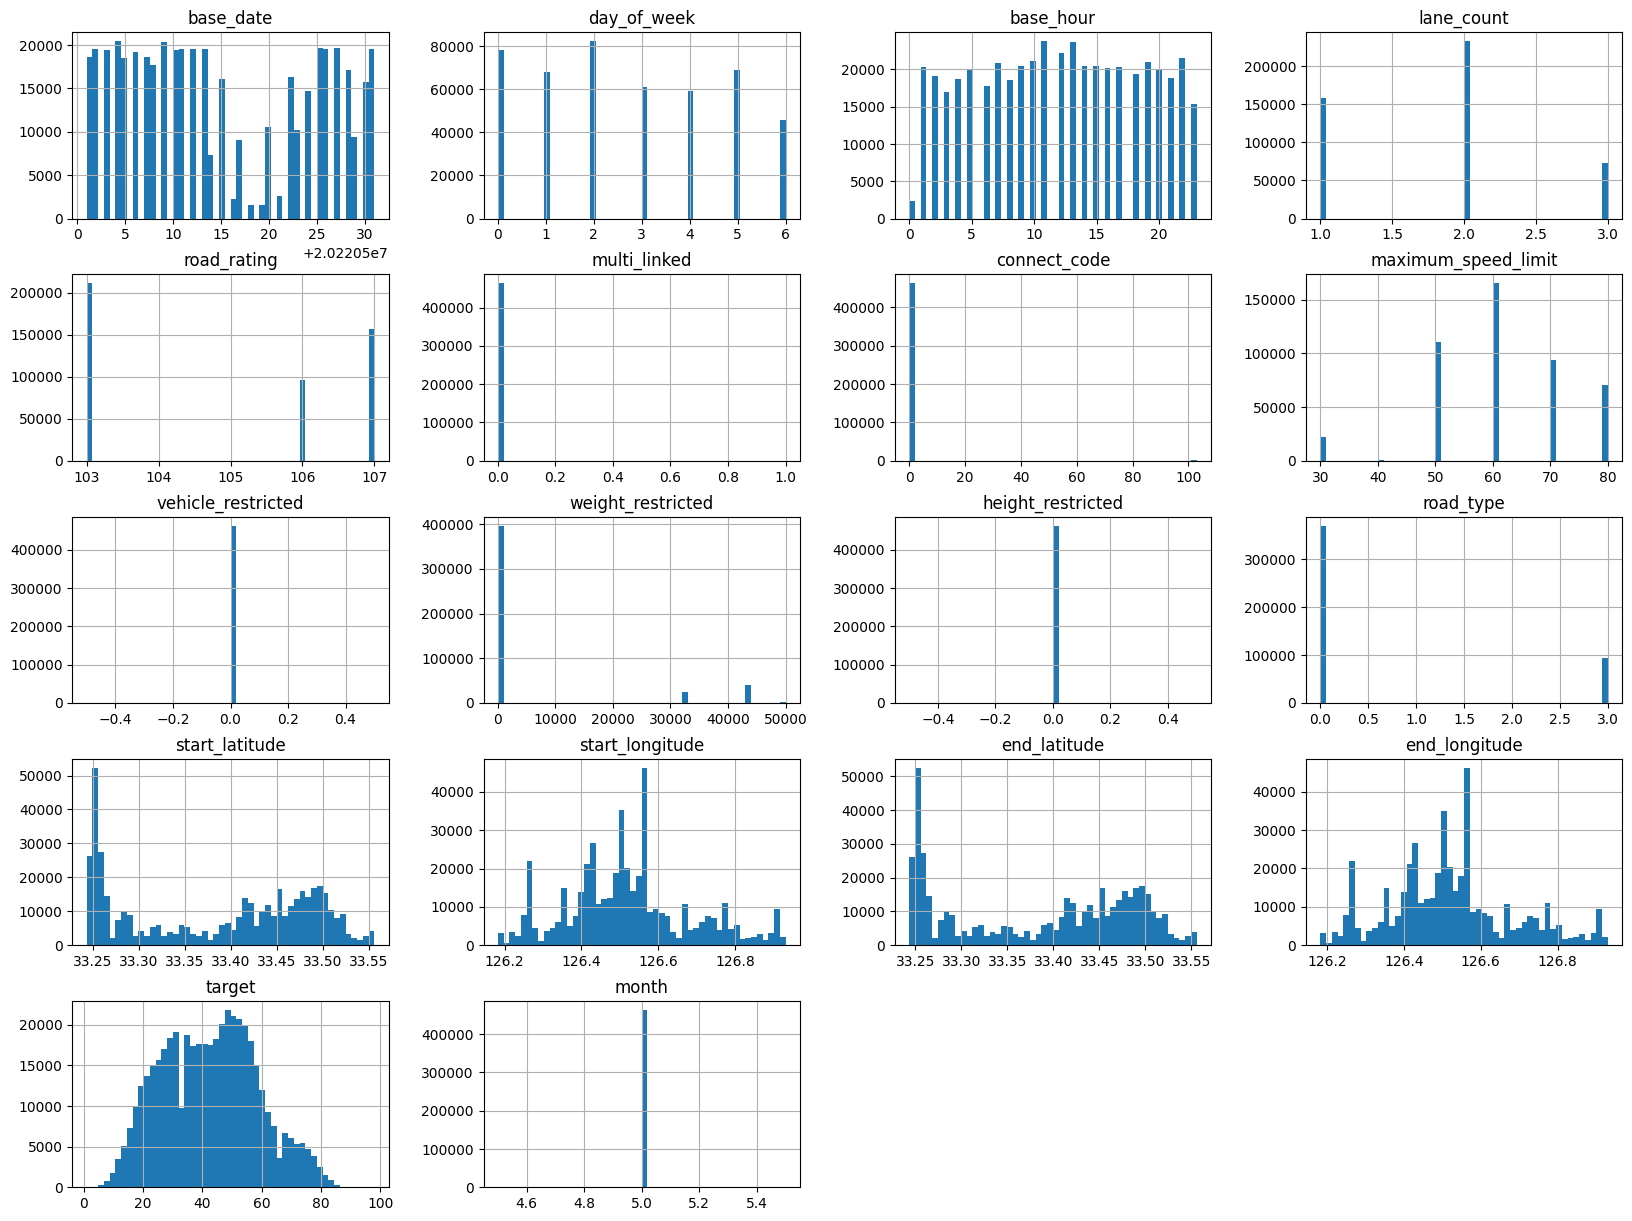

In [20]:
feb_data = data[data['month'] == 5]
feb_data.hist(bins=50, figsize=(20, 15))
plt.show()

## nov dist

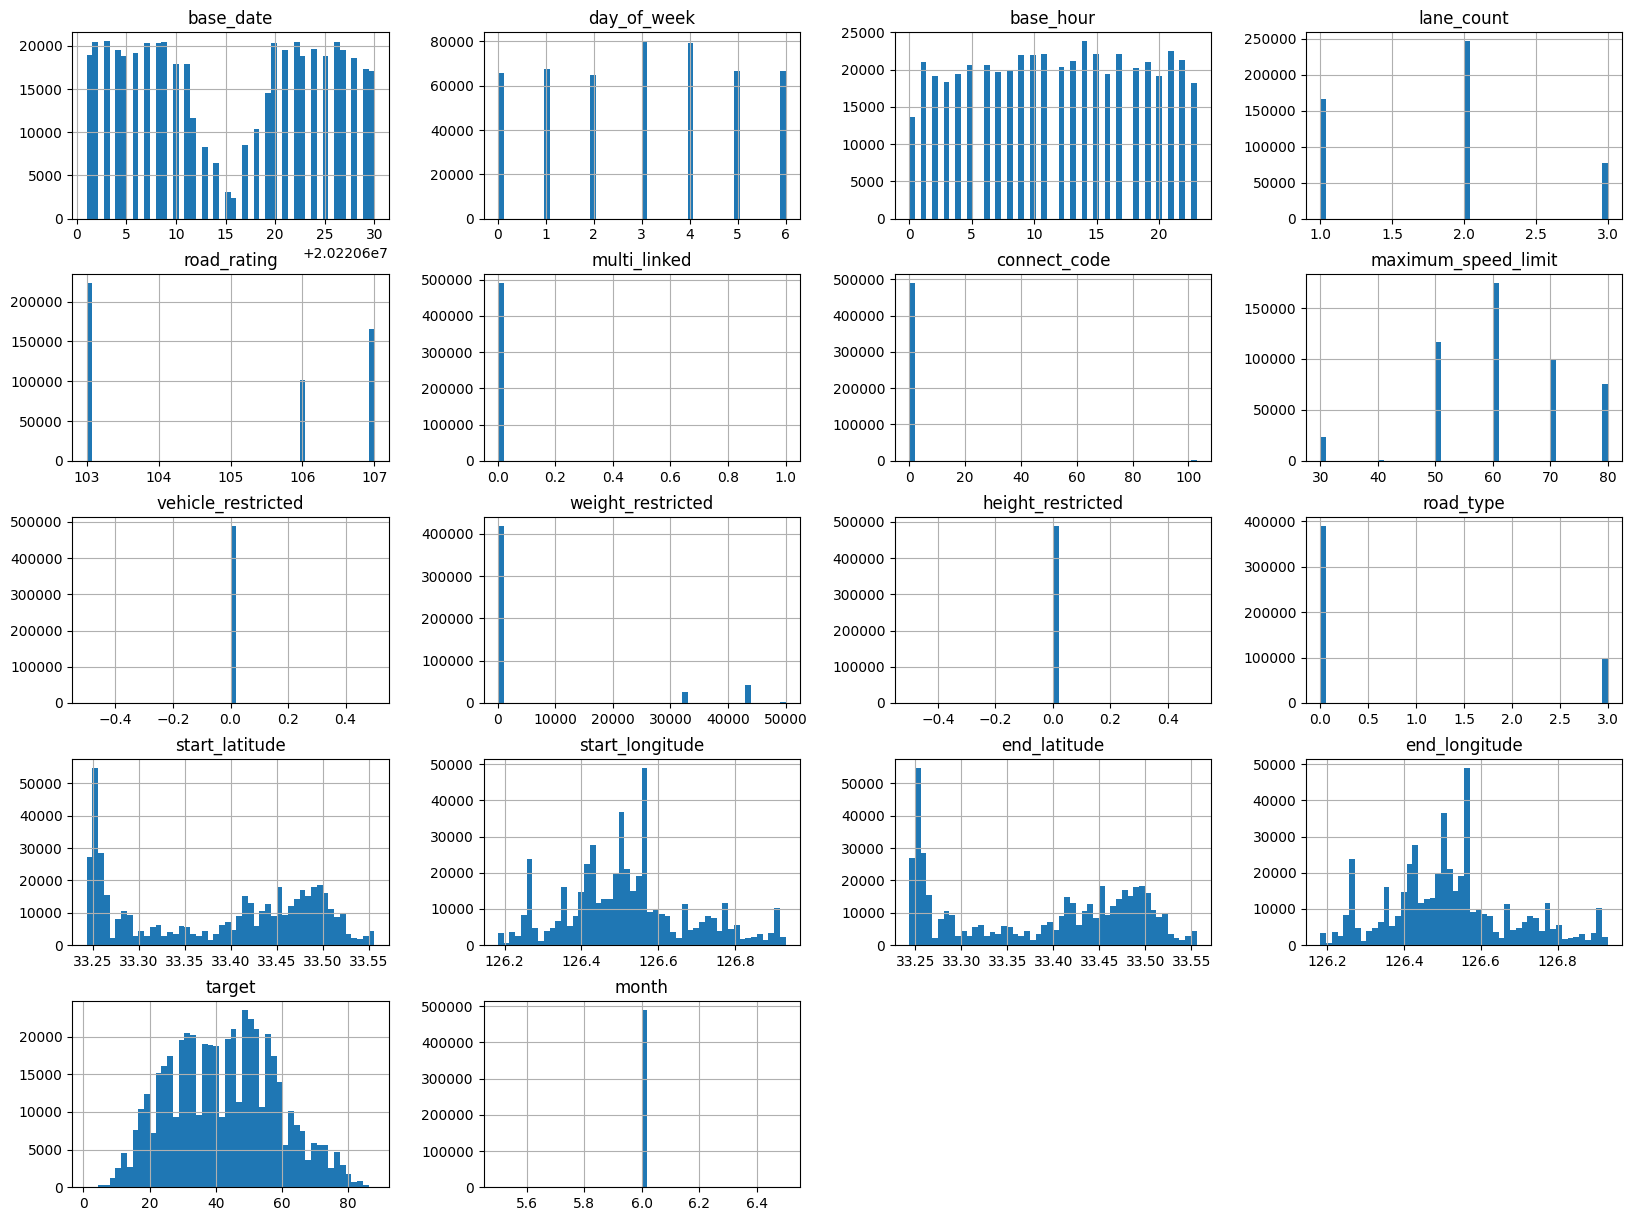

In [22]:
nov_data = data[data['month'] == 6]
nov_data.hist(bins=50, figsize=(20, 15))
plt.show()

## holiday add

In [49]:
krx = ecals.get_calendar("XKRX")
df = pd.DataFrame(krx.schedule.loc["2021-01-01":"2022-12-31"])
df

/root/anaconda3/envs/traffic/lib/python3.8/site-packages/pandas/core/arrays/datetimelike.py:498: FutureWarning: CustomBusinessDay.apply is deprecated and will be removed in a future version. Use `offset + other` instead
  if all(pair[0][-1] + obj.freq == pair[1][0] for pair in pairs):
/root/anaconda3/envs/traffic/lib/python3.8/site-packages/pandas/core/arrays/datetimelike.py:498: FutureWarning: CustomBusinessDay.apply is deprecated and will be removed in a future version. Use `offset + other` instead
  if all(pair[0][-1] + obj.freq == pair[1][0] for pair in pairs):


,open,break_start,break_end,close
2021-01-04,2021-01-04 01:00:00+00:00,NaT,NaT,2021-01-04 06:30:00+00:00
2021-01-05,2021-01-05 00:00:00+00:00,NaT,NaT,2021-01-05 06:30:00+00:00
2021-01-06,2021-01-06 00:00:00+00:00,NaT,NaT,2021-01-06 06:30:00+00:00
2021-01-07,2021-01-07 00:00:00+00:00,NaT,NaT,2021-01-07 06:30:00+00:00
2021-01-08,2021-01-08 00:00:00+00:00,NaT,NaT,2021-01-08 06:30:00+00:00
...,...,...,...,...
2022-12-23,2022-12-23 00:00:00+00:00,NaT,NaT,2022-12-23 06:30:00+00:00
2022-12-26,2022-12-26 00:00:00+00:00,NaT,NaT,2022-12-26 06:30:00+00:00
2022-12-27,2022-12-27 00:00:00+00:00,NaT,NaT,2022-12-27 06:30:00+00:00
2022-12-28,2022-12-28 00:00:00+00:00,NaT,NaT,2022-12-28 06:30:00+00:00


In [56]:
open_date = pd.to_datetime(df['open'])
open_date = open_date.dt.strftime('%Y%m%d')
open_date = open_date.astype(int)
open_date = list(open_date)

In [72]:
data['holiday'] = data['base_date'].isin(open_date)
data['holiday']

0           True
1           True
2          False
3           True
4           True
           ...  
4701212     True
4701213     True
4701214     True
4701215     True
4701216     True
Name: holiday, Length: 4701217, dtype: bool

In [73]:
holiday_exist = {True : 0, False : 1}
data['holiday'] = data['holiday'].map(holiday_exist)
data['holiday'].value_counts()

0    3103484
1    1597733
Name: holiday, dtype: int64

<AxesSubplot: >

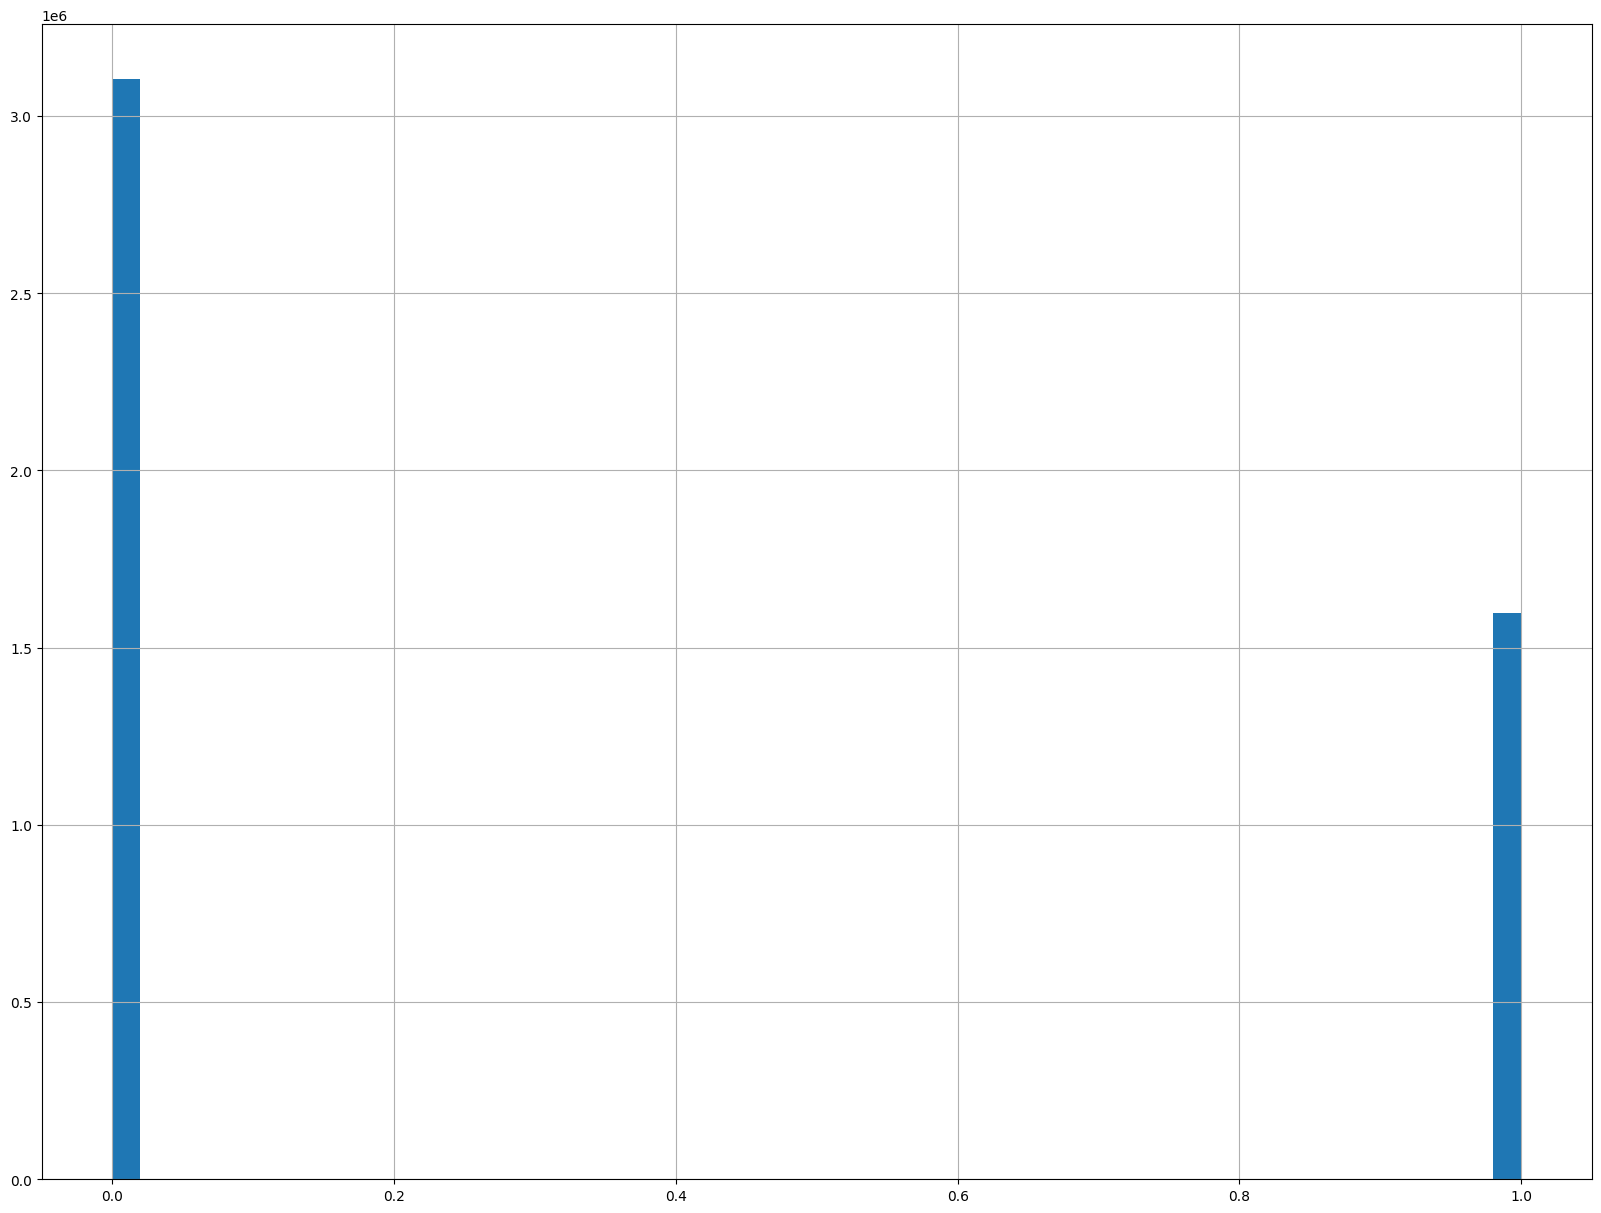

In [74]:
data['holiday'].hist(bins=50, figsize=(20, 15))